# Code Written by:
**Shweta Tiwari**
*20 Oct 2023*

## Algorithm: Strongly Connected Components

In [1]:
import time

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Algorithm

In [3]:
%%time
def strongly_connected_components(graph):
    times, _ = depth_first_search(graph.nodes(), graph)
    _, components = depth_first_search(reversed(times), graph.reverse())

    return components

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [4]:
%%time
def depth_first_search(nodes, graph):
    times, components, explored = [], [], set()

    for node in nodes:
        component = []
        stack = [(False, node)]

        while stack:
            complete, i = stack.pop()

            # check if already processed
            if complete:
                times.append(i)
                continue
            elif i in explored:
                continue

            # mark the node
            component.append(i)
            explored.add(i)

            # search in depth
            stack.append((True, i))
            stack.extend((False, i) for i in graph[i])

        if component:
            components.append(component)

    return times, components

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.3 µs


# Run

## Graph #1

In [5]:
%%time
graph = nx.DiGraph()
graph.add_nodes_from(range(6))
graph.add_edges_from([
    (0, 1), (1, 2), (2, 0),
    (3, 4), (4, 5), (5, 3),
    (0, 5), (2, 3),
])

CPU times: user 147 µs, sys: 0 ns, total: 147 µs
Wall time: 151 µs


CPU times: user 84.2 ms, sys: 32 ms, total: 116 ms
Wall time: 138 ms


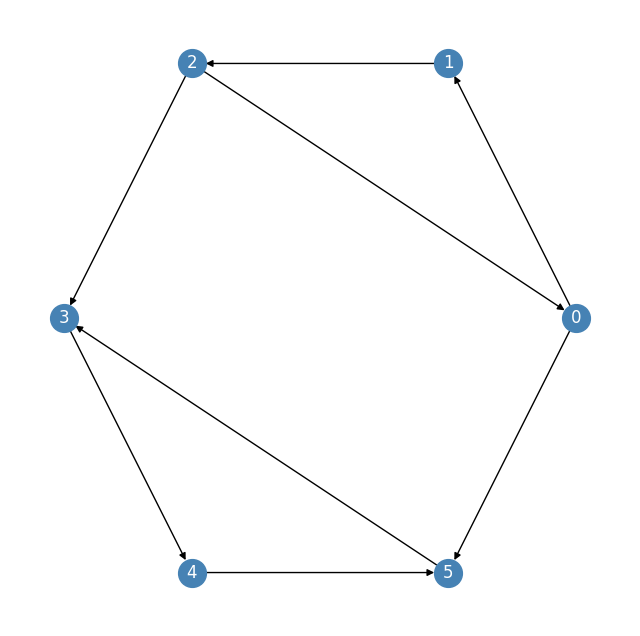

In [6]:
%%time
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(graph, pos=nx.circular_layout(graph), node_size=400, node_color='steelblue', font_color='white')

In [7]:
%%time
strongly_connected_components(graph)

CPU times: user 240 µs, sys: 52 µs, total: 292 µs
Wall time: 298 µs


[[0, 2, 1], [5, 4, 3]]

## Graph #2

In [8]:
%%time
graph = nx.DiGraph()
graph.add_nodes_from(range(7))
graph.add_edges_from([
    (0, 1), (1, 2), (2, 0),
    (0, 3), (3, 4), (4, 0),
    (0, 5), (5, 6), (6, 0),
])

CPU times: user 166 µs, sys: 0 ns, total: 166 µs
Wall time: 330 µs


CPU times: user 65.3 ms, sys: 29.8 ms, total: 95.1 ms
Wall time: 63.1 ms


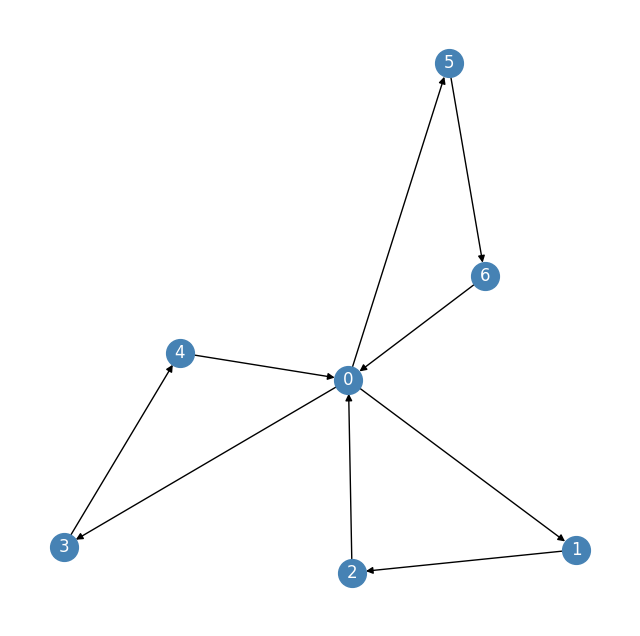

In [9]:
%%time
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(graph, node_size=400, node_color='steelblue', font_color='white')

In [10]:
%%time
strongly_connected_components(graph)

CPU times: user 301 µs, sys: 0 ns, total: 301 µs
Wall time: 305 µs


[[0, 6, 5, 4, 3, 2, 1]]

## Graph #3

In [11]:
%%time
graph = nx.DiGraph()
graph.add_nodes_from(range(7))
graph.add_edges_from([
    (0, 2), (2, 4), (4, 6), (6, 0),
    (0, 1), (2, 3), (4, 5), (6, 7),
])

CPU times: user 167 µs, sys: 0 ns, total: 167 µs
Wall time: 191 µs


CPU times: user 65.2 ms, sys: 25.1 ms, total: 90.2 ms
Wall time: 63 ms


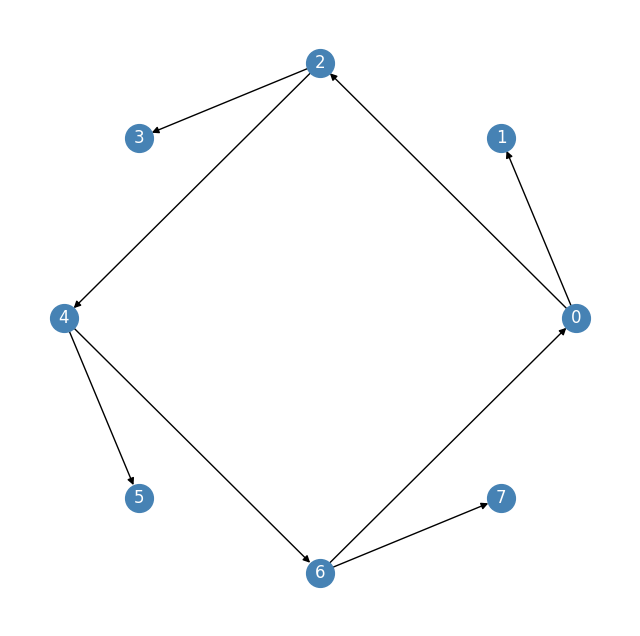

In [12]:
%%time
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(graph, pos=nx.circular_layout(graph), node_size=400, node_color='steelblue', font_color='white')

In [13]:
%%time
strongly_connected_components(graph)

CPU times: user 316 µs, sys: 0 ns, total: 316 µs
Wall time: 321 µs


[[0, 6, 4, 2], [7], [5], [3], [1]]

# The End